In [ ]:
!pip3 install opencv-python

In [26]:
!ls /home/21rfk/.local/lib/python3.8/site-packages/cv2/data/

haarcascade_eye_tree_eyeglasses.xml
haarcascade_eye.xml
haarcascade_frontalcatface_extended.xml
haarcascade_frontalcatface.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_default.xml
haarcascade_fullbody.xml
haarcascade_lefteye_2splits.xml
haarcascade_licence_plate_rus_16stages.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_righteye_2splits.xml
haarcascade_russian_plate_number.xml
haarcascade_smile.xml
haarcascade_upperbody.xml
__init__.py
__pycache__


In [76]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
img = cv2.imread('haircut face before after 1/0.jpg')
image_copy = np.copy(img)

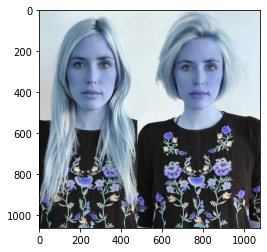

In [77]:
plt.imshow(img)

In [78]:
from detect_face import detect_faces, crop_faces
# Convert the image to gray 
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.25, minNeighbors=3, minSize=(40,40))

In [79]:
# Print number of faces found
print('Number of faces detected:', len(faces))

Number of faces detected: 2


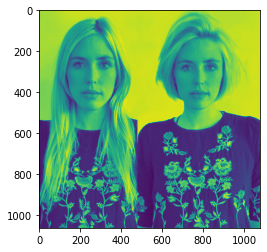

In [80]:
plt.imshow(gray_image)

In [81]:
padding = 25

crops = []

for count,face in enumerate(faces):
    x, y, w, h = face
    left = x - padding
    right = x+w + padding
    top = y - padding
    bottom = y+h + padding
    cv2.rectangle(img,(left,top),(right,bottom),(255,0,0),2)
    crop = image_copy[top:bottom,left:right]
    crops.append({'img':crop,'weight':x+y})
    
crops.sort(key=lambda x: x['weight'])

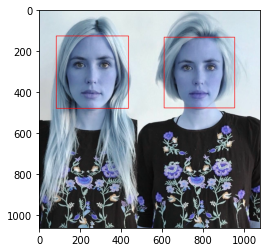

In [82]:
plt.imshow(img)

<ipython-input-85-a8484b8746a0>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(crops) / columns + 1, columns, i + 1)


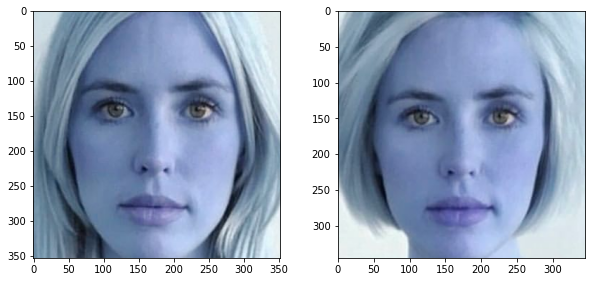

In [85]:
plt.figure(figsize=(10,10))
columns = 2
target_size=(224,224)
target_base_path=r'./hairdoo_sample'

# create directory if doesn't exist
Path(target_base_path).mkdir(parents=True, exist_ok=True)

for i, im in enumerate(crops):
    plt.subplot(len(crops) / columns + 1, columns, i + 1)
    resized = cv2.resize(im['img'], target_size, interpolation = cv2.INTER_AREA)
    plt.imshow(im['img'])
    filename = f'{target_base_path}/{i+1}.jpg'
    cv2.imwrite(filename, resized)
    